<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab5_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Absenteeism_at_work.xls')
df.head(5)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [ ]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# Data Preprocessing


In [ ]:
# Data Preprocessing
df.fillna(df.median(), inplace=True)  # Handle missing values

# Encode categorical columns
categorical_cols = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                    'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker', 'Pet']

# Apply label encoding to categorical columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Standardize numerical features for distance-based clustering
scaler = StandardScaler()
numerical_cols = ['Transportation expense', 'Distance from Residence to Work', 'Service time',
                  'Age', 'Work load Average/day ', 'Body mass index', 'Absenteeism time in hours']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Feature Selection
X = df[numerical_cols + categorical_cols]

# K-Means Clustering and Hyperparameter Tuning


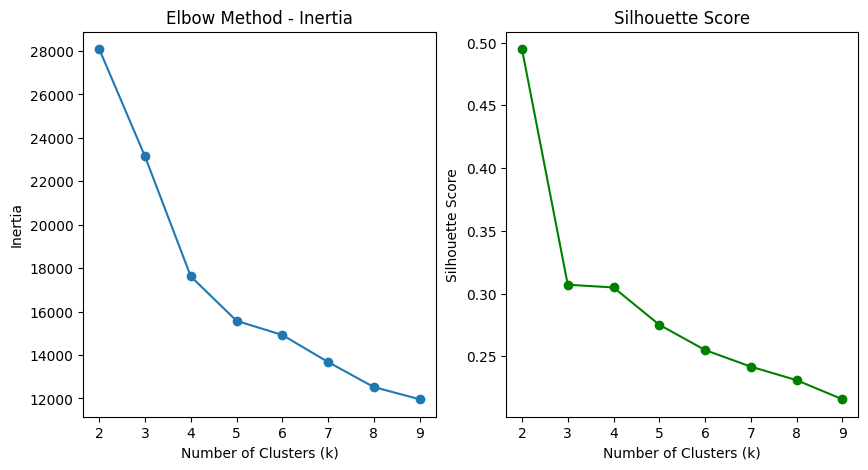

In [ ]:
def tune_kmeans(X, k_range):
    inertia = []
    silhouette = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette.append(silhouette_score(X, kmeans.labels_))
    return inertia, silhouette

k_range = range(2, 10)
inertia, silhouette = tune_kmeans(X, k_range)

# Plot Inertia (Elbow Method) and Silhouette Score
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

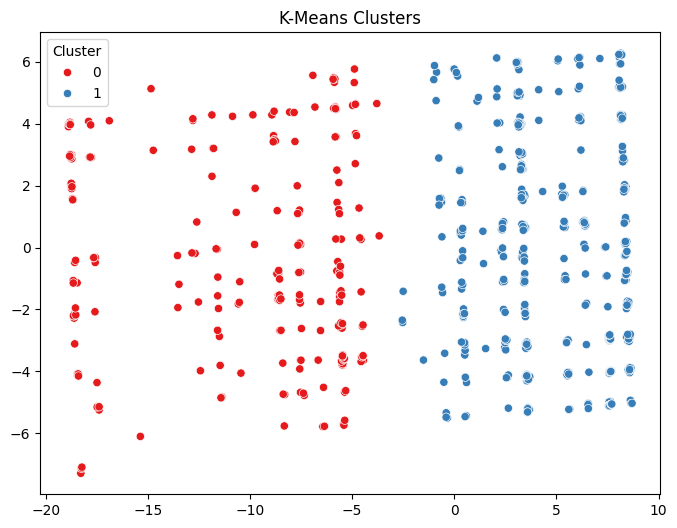

Silhouette Score for 2 clusters: 0.49


In [ ]:
# Optimal number of clusters based on the Silhouette Score or Elbow Method
optimal_k = k_range[silhouette.index(max(silhouette))]

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Assign cluster labels
df['Cluster'] = kmeans.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='Set1')
plt.title('K-Means Clusters')
plt.show()

# Evaluation - Silhouette Score
sil_score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score for {optimal_k} clusters: {sil_score:.2f}')